# Ski area cost dataset building
### for R spatial statistics analysis

This notebook is dedicated to the pre-processing of data for the `5_spatial_statistics_analysis.Rmd` file in which an analysis on the costs of ski passes for the ski resorts in the area is conducted.

### Set up

In [2]:
import geopandas as gpd
import os
import pandas as pd
import matplotlib.pyplot as plt
from functions import *

### Save the shape of the South Tirol Dolomiti's area:

In [3]:
area_dolomiti_BZ = dissolve_province_dolomiti_area(21)
if not os.path.exists('data/area_dolomiti_BZ'):
    os.mkdir("data/area_dolomiti_BZ")
    area_dolomiti_BZ.to_file('data/area_dolomiti_BZ/area_dolomiti_BZ.shp')

### Add ski areas' prices data

Import ski slopes data:

In [4]:
ski_slopes_BZ = gpd.read_file("data\Ski_slopes_data")
ski_slopes_BZ = ski_slopes_BZ.to_crs(epsg=4326)
ski_slopes_BZ_clipped = ski_slopes_BZ.clip(area_dolomiti_BZ)

ski_lifts_BZ = gpd.read_file("data\Ski_lifts_data")
ski_lifts_BZ = ski_lifts_BZ.to_crs(epsg=4326)
ski_lifts_BZ_clipped = ski_lifts_BZ.clip(area_dolomiti_BZ)


Add prices based on a browse through each ski resort website:

In [5]:
ski_slopes_BZ_clipped_prices = ski_slopes_BZ_clipped
ski_slopes_BZ_clipped_prices['prices'] = ""

ski_slopes_BZ_clipped_prices.loc[ski_slopes_BZ_clipped_prices['NAME_IT'] == 'Pedraces', ['prices']] = 62.00
ski_slopes_BZ_clipped_prices.loc[ski_slopes_BZ_clipped_prices['NAME_IT'] == 'Passo Oclini', ['prices']] =  20.00
ski_slopes_BZ_clipped_prices.loc[ski_slopes_BZ_clipped_prices['NAME_IT'] == 'Braies Vecchia', ['prices']] = 61.00 
ski_slopes_BZ_clipped_prices.loc[ski_slopes_BZ_clipped_prices['NAME_IT'] == 'Seceda', ['prices']] = 62.00
ski_slopes_BZ_clipped_prices.loc[ski_slopes_BZ_clipped_prices['NAME_IT'] == 'Antermoia', ['prices']] = 50.00 
ski_slopes_BZ_clipped_prices.loc[ski_slopes_BZ_clipped_prices['NAME_IT'] == 'Obereggen', ['prices']] = 55.00
ski_slopes_BZ_clipped_prices.loc[ski_slopes_BZ_clipped_prices['NAME_IT'] == 'Alpe di Siusi', ['prices']] = 62.00
ski_slopes_BZ_clipped_prices.loc[ski_slopes_BZ_clipped_prices['NAME_IT'] == 'S. Vigilio di Marebbe', ['prices']] = 62.00
ski_slopes_BZ_clipped_prices.loc[ski_slopes_BZ_clipped_prices['NAME_IT'] == 'Baranci', ['prices']] = 61.00
ski_slopes_BZ_clipped_prices.loc[ski_slopes_BZ_clipped_prices['NAME_IT'] == 'Gardenaccia', ['prices']] = 62.00
ski_slopes_BZ_clipped_prices.loc[ski_slopes_BZ_clipped_prices['NAME_IT'] == 'Filler', ['prices']] = 50.00
ski_slopes_BZ_clipped_prices.loc[ski_slopes_BZ_clipped_prices['NAME_IT'] == 'Pietralba', ['prices']] = 50.00
ski_slopes_BZ_clipped_prices.loc[ski_slopes_BZ_clipped_prices['NAME_IT'] == 'Panorama', ['prices']] = 55.00
ski_slopes_BZ_clipped_prices.loc[ski_slopes_BZ_clipped_prices['NAME_IT'] == 'Carezza', ['prices']] = 52.00
ski_slopes_BZ_clipped_prices.loc[ski_slopes_BZ_clipped_prices['NAME_IT'] == 'Castelrotto', ['prices']] = 50.00
ski_slopes_BZ_clipped_prices.loc[ski_slopes_BZ_clipped_prices['NAME_IT'] == 'Corvara-Badia', ['prices']] = 62.00
ski_slopes_BZ_clipped_prices.loc[ski_slopes_BZ_clipped_prices['NAME_IT'] == 'Sesto-Monte Elmo-Prati di Croda Rossa', ['prices']] = 61.00
ski_slopes_BZ_clipped_prices.loc[ski_slopes_BZ_clipped_prices['NAME_IT'] == 'Plan de corones', ['prices']] = 62.00
ski_slopes_BZ_clipped_prices.loc[ski_slopes_BZ_clipped_prices['NAME_IT'] == 'Nova Ponente', ['prices']] = 55.00
ski_slopes_BZ_clipped_prices.loc[ski_slopes_BZ_clipped_prices['NAME_IT'] == 'Monte Pana-Ciampinoi-Passo Sella', ['prices']] = 62.00
ski_slopes_BZ_clipped_prices.loc[ski_slopes_BZ_clipped_prices['NAME_IT'] == 'Rienza', ['prices']] = 37.50
ski_slopes_BZ_clipped_prices.loc[ski_slopes_BZ_clipped_prices['NAME_IT'] == 'Danterceppies-Passo Gardena', ['prices']] = 62.00
ski_slopes_BZ_clipped_prices.loc[ski_slopes_BZ_clipped_prices['NAME_IT'] == 'Passo Monte Croce Comelico', ['prices']] = 61.00
ski_slopes_BZ_clipped_prices.loc[ski_slopes_BZ_clipped_prices['NAME_IT'] == 'Keil', ['prices']] = 62.00


ski_slopes_BZ_clipped_prices

,OBJECTID,SKIKEY,PLR,SKIZONE,NAME_IT,NAME_DE,PERIMETER,AREA,SHAPE,geometry,prices
42,19814.0,09.03,9.0,3.0,Passo Oclini,Jochgrimm,10268.23,263014.59,None,"POLYGON ((11.45535 46.34220, 11.45539 46.34225...",20.0
43,19815.0,09.02,9.0,2.0,Obereggen,Obereggen,34349.71,1025846.14,None,"POLYGON ((11.54576 46.35155, 11.54599 46.35167...",55.0
7,19797.0,09.13,9.0,13.0,Pietralba,Weissenstein,3254.14,31874.84,None,"POLYGON ((11.40464 46.38949, 11.40526 46.38964...",50.0
20,19801.0,09.12,9.0,12.0,Panorama,Panorama,1613.21,71155.02,None,"POLYGON ((11.38559 46.39309, 11.38553 46.39312...",55.0
29,19781.0,09.01,9.0,1.0,Carezza,Karerpass,2091.76,26603.43,None,"POLYGON ((11.59721 46.39920, 11.59735 46.39932...",52.0
59,19821.0,09.11,9.0,11.0,Nova Ponente,Deutschnofen,1278.57,27610.65,None,"POLYGON ((11.44238 46.40267, 11.44245 46.40265...",55.0
81,19747.0,09.01,9.0,1.0,Carezza,Karerpass,26734.26,971460.21,None,"MULTIPOLYGON (((11.59469 46.42807, 11.59478 46...",52.0
49,19782.0,09.01,9.0,1.0,Carezza,Karerpass,22460.62,529695.47,None,"POLYGON ((11.60384 46.44557, 11.60403 46.44552...",52.0
69,19831.0,10.02,10.0,2.0,Alpe di Siusi,Seiseralm,326.37,5589.98,None,"POLYGON ((11.67007 46.53175, 11.66975 46.53198...",62.0
68,19830.0,10.02,10.0,2.0,Alpe di Siusi,Seiseralm,103994.64,2488113.67,None,"POLYGON ((11.66048 46.55835, 11.66062 46.55834...",62.0


Visualize ski resorts (ski slopes colored by `NAME_IT` shapes):

<AxesSubplot:>

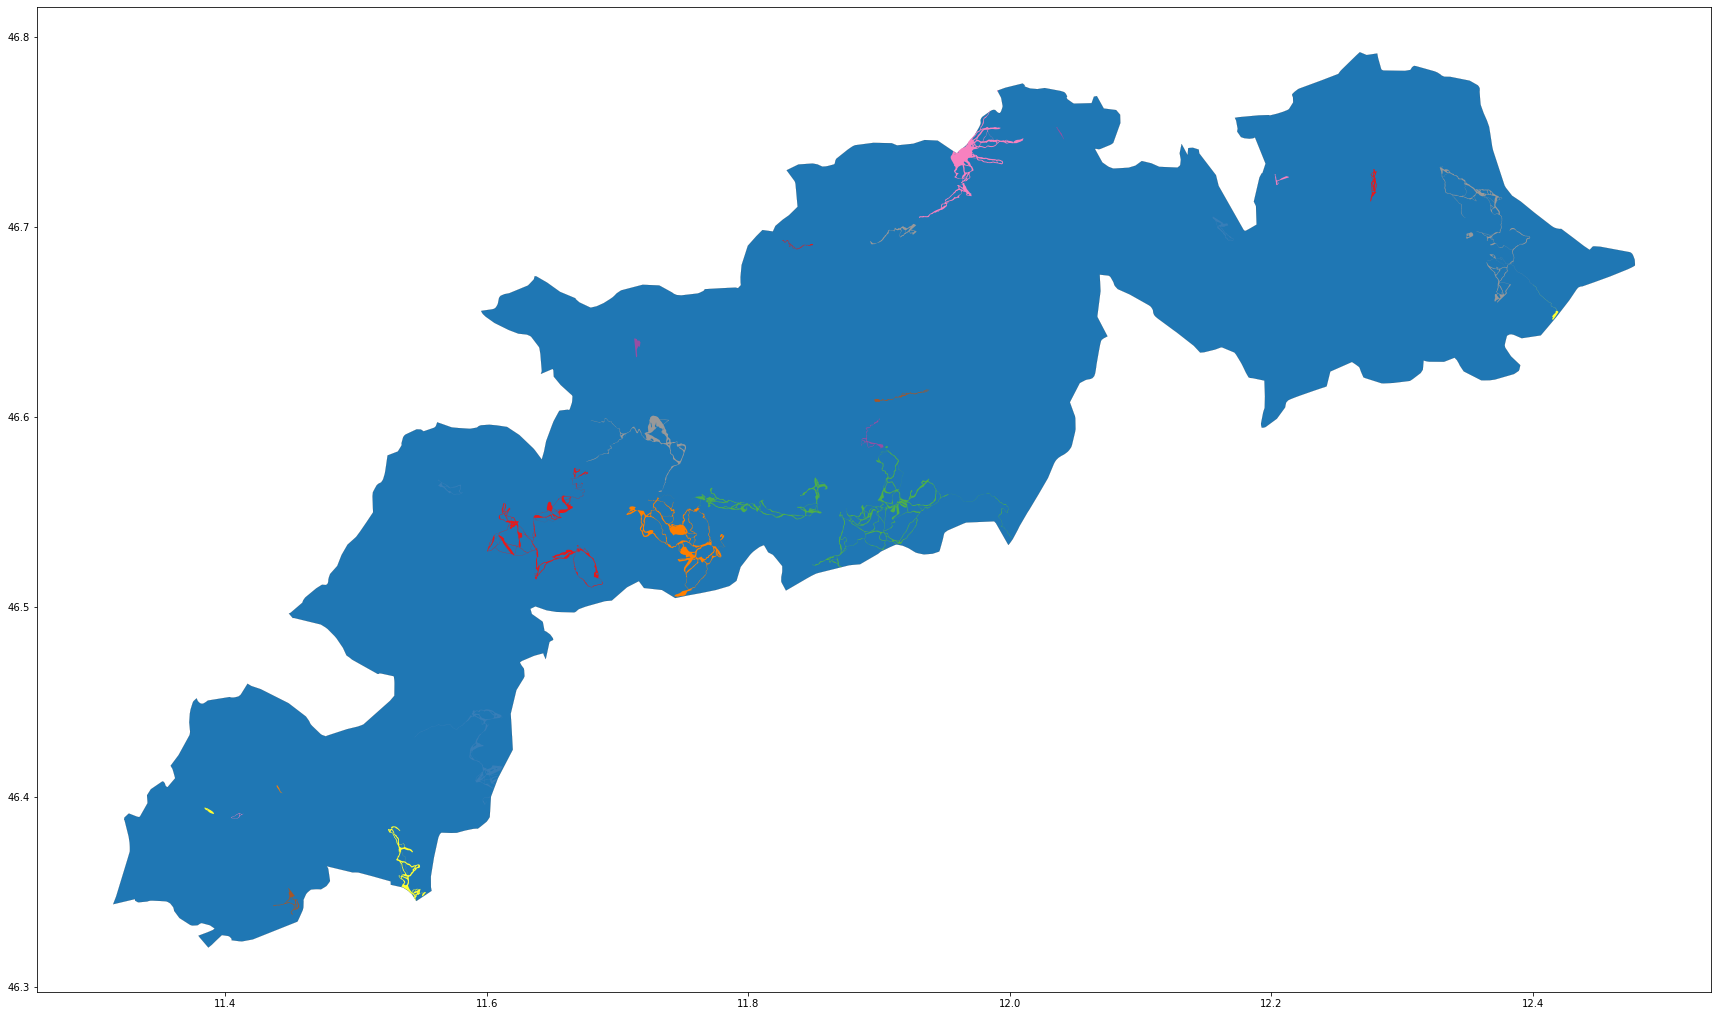

In [6]:

base = area_dolomiti_BZ.plot(
    figsize=(30,30),
    edgecolor="k",
    lw=0.1
)

ski_slopes_BZ_clipped.plot(
    ax=base,
    column='NAME_IT',
    cmap='Set1',

)


Since each price refers to the whole resort area, let's group each ski slopes based on `NAME_IT` (ski resort name) and dissolve their borders:

In [10]:
ski_slopes_BZ_clipped_dissolved = ski_slopes_BZ_clipped.to_crs(epsg=4326).dissolve(by='NAME_IT')
ski_slopes_BZ_clipped_dissolved

,geometry,OBJECTID,SKIKEY,PLR,SKIZONE,NAME_DE,PERIMETER,AREA,SHAPE,prices
NAME_IT,,,,,,,,,,
Alpe di Siusi,"MULTIPOLYGON (((11.66971 46.53198, 11.66919 46...",19831.0,10.02,10.0,2.0,Seiseralm,326.37,5589.98,None,62.0
Antermoia,"POLYGON ((11.84702 46.69042, 11.84707 46.69051...",19750.0,14.03,14.0,3.0,Untermoi,5621.42,83493.85,None,50.0
Baranci,"POLYGON ((12.27616 46.72718, 12.27610 46.72731...",19749.0,16.02,16.0,2.0,Haunold,8475.58,288835.86,None,61.0
Braies Vecchia,"POLYGON ((12.15511 46.70515, 12.15518 46.70526...",19759.0,16.03,16.0,3.0,Altprags,8392.11,273267.47,None,61.0
Carezza,"MULTIPOLYGON (((11.59744 46.39939, 11.59751 46...",19781.0,09.01,9.0,1.0,Karerpass,2091.76,26603.43,None,52.0
Castelrotto,"POLYGON ((11.56257 46.56681, 11.56264 46.56687...",19783.0,10.01,10.0,1.0,Kastelruth,8158.88,179288.20,None,50.0
Corvara-Badia,"MULTIPOLYGON (((11.98200 46.55962, 11.98200 46...",19756.0,15.01,15.0,1.0,Corvara-Abtei,142191.11,2925931.80,None,62.0
Danterceppies-Passo Gardena,"MULTIPOLYGON (((11.76280 46.55377, 11.76281 46...",19779.0,10.05,10.0,5.0,Danterceppies-Grödnerjoch,3272.85,99036.51,None,62.0
Filler,"POLYGON ((11.71259 46.64121, 11.71356 46.64119...",19763.0,11.13,11.0,13.0,Filler,2707.28,186099.19,None,50.0


Ricalculate ski resort areas:

In [11]:
ski_slopes_BZ_clipped_dissolved= ski_slopes_BZ_clipped_dissolved.to_crs(epsg=32632)
ski_slopes_BZ_clipped_dissolved["AREA"] = ski_slopes_BZ_clipped_dissolved['geometry'].area
ski_slopes_BZ_clipped_dissolved = ski_slopes_BZ_clipped_dissolved.to_crs(epsg=4326)
ski_slopes_BZ_clipped_dissolved

,geometry,OBJECTID,SKIKEY,PLR,SKIZONE,NAME_DE,PERIMETER,AREA,SHAPE,prices
NAME_IT,,,,,,,,,,
Alpe di Siusi,"MULTIPOLYGON (((11.66971 46.53198, 11.66919 46...",19831.0,10.02,10.0,2.0,Seiseralm,326.37,2.661013e+06,None,62.0
Antermoia,"POLYGON ((11.84702 46.69042, 11.84707 46.69051...",19750.0,14.03,14.0,3.0,Untermoi,5621.42,8.349385e+04,None,50.0
Baranci,"POLYGON ((12.27616 46.72718, 12.27610 46.72731...",19749.0,16.02,16.0,2.0,Haunold,8475.58,2.888359e+05,None,61.0
Braies Vecchia,"POLYGON ((12.15511 46.70515, 12.15518 46.70526...",19759.0,16.03,16.0,3.0,Altprags,8392.11,2.732675e+05,None,61.0
Carezza,"MULTIPOLYGON (((11.59744 46.39939, 11.59751 46...",19781.0,09.01,9.0,1.0,Karerpass,2091.76,1.518392e+06,None,52.0
Castelrotto,"POLYGON ((11.56257 46.56681, 11.56264 46.56687...",19783.0,10.01,10.0,1.0,Kastelruth,8158.88,1.792882e+05,None,50.0
Corvara-Badia,"MULTIPOLYGON (((11.98200 46.55962, 11.98200 46...",19756.0,15.01,15.0,1.0,Corvara-Abtei,142191.11,3.020846e+06,None,62.0
Danterceppies-Passo Gardena,"MULTIPOLYGON (((11.76280 46.55377, 11.76281 46...",19779.0,10.05,10.0,5.0,Danterceppies-Grödnerjoch,3272.85,1.707596e+06,None,62.0
Filler,"POLYGON ((11.71259 46.64121, 11.71356 46.64119...",19763.0,11.13,11.0,13.0,Filler,2707.28,1.860992e+05,None,50.0


Calculate each resort representative point:

In [13]:
ski_slopes_BZ_clipped_dissolved["repr_point"] = ski_slopes_BZ_clipped_dissolved.to_crs(epsg=32632).representative_point()


Update the geometry with the representative points coordinates:

In [14]:
ski_slopes_BZ_clipped_dissolved = ski_slopes_BZ_clipped_dissolved.drop(columns=['geometry'])
ski_slopes_BZ_clipped_dissolved = ski_slopes_BZ_clipped_dissolved.set_geometry('repr_point').rename_geometry('geometry')

<AxesSubplot:>

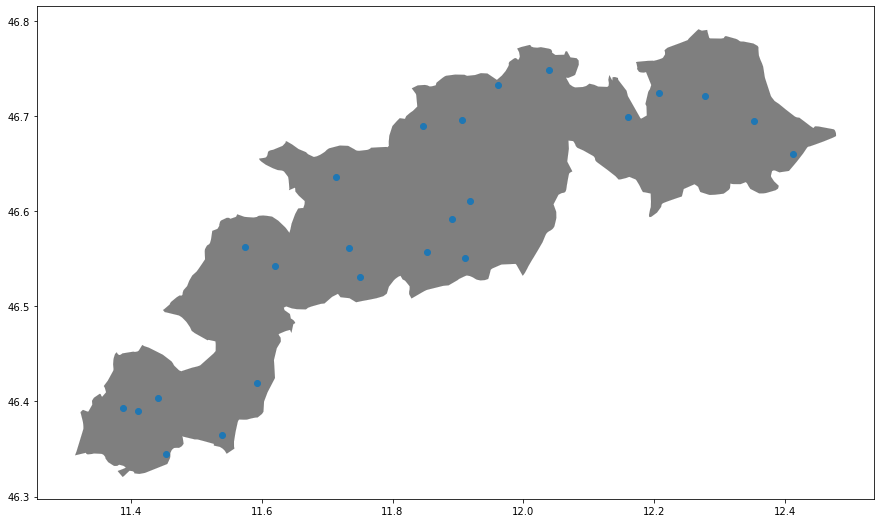

In [15]:
base = area_dolomiti_BZ.plot(
    figsize=(15,15),
    color="black",
    edgecolor="k",
    alpha=0.5,
    lw=0.1
)
ski_slopes_BZ_clipped_dissolved.to_crs(epsg=4326).plot(ax=base)

Drop unuseful column (for the spatial statistics analysis purposes) and save the GeoDataFrame:

In [17]:
ski_slopes_BZ_clipped_dissolved.drop(columns=['SKIKEY', 'PLR', 'SKIZONE', 'PERIMETER', 'SHAPE'], inplace=True)
ski_slopes_BZ_clipped_dissolved = ski_slopes_BZ_clipped_dissolved.to_crs(epsg=4326)
if not os.path.exists('data/ski_slopes_BZ_dissolved'):
    os.mkdir("data/ski_slopes_BZ_dissolved")
    ski_slopes_BZ_clipped_dissolved.to_file('data/ski_slopes_BZ_dissolved/ski_slopes_BZ_dissolved.shp')

In [18]:
ski_slopes_BZ_clipped_dissolved

,OBJECTID,NAME_DE,AREA,prices,geometry
NAME_IT,,,,,
Alpe di Siusi,19831.0,Seiseralm,2.661013e+06,62.0,POINT (11.61972 46.54297)
Antermoia,19750.0,Untermoi,8.349385e+04,50.0,POINT (11.84690 46.69019)
Baranci,19749.0,Haunold,2.888359e+05,61.0,POINT (12.27826 46.72175)
Braies Vecchia,19759.0,Altprags,2.732675e+05,61.0,POINT (12.15985 46.69906)
Carezza,19781.0,Karerpass,1.518392e+06,52.0,POINT (11.59219 46.41907)
Castelrotto,19783.0,Kastelruth,1.792882e+05,50.0,POINT (11.57444 46.56293)
Corvara-Badia,19756.0,Corvara-Abtei,3.020846e+06,62.0,POINT (11.91069 46.55113)
Danterceppies-Passo Gardena,19779.0,Danterceppies-Grödnerjoch,1.707596e+06,62.0,POINT (11.85232 46.55691)
Filler,19763.0,Filler,1.860992e+05,50.0,POINT (11.71426 46.63632)
